## Parabolic Phi

ne(ρ) = a ρ^2 + b ρ + c  
then φ will be [a, b, c].

Prior distribution: $p(\phi)$

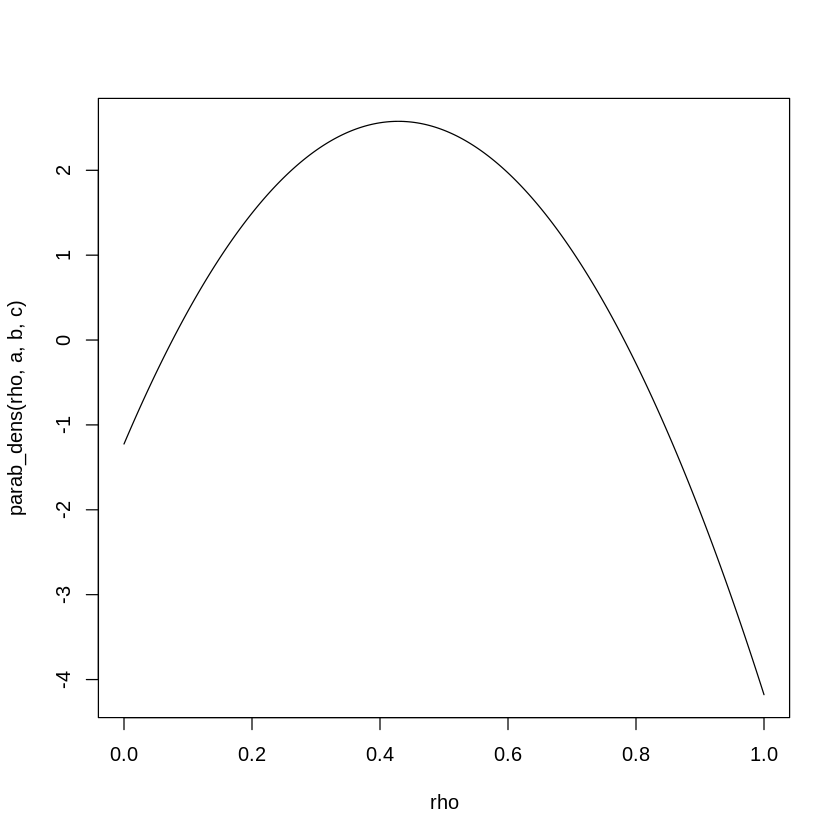

In [5]:
parab_dens <- function(rho, a, b, c){a*rho^2+ b*rho+ c}#Parabolic Electron Density
a <- -20.69092 ; b <- 17.73766; c <- -1.224814 
rho <- seq(0, 1, 0.001)
plot(rho, parab_dens(rho, a, b, c), type = 'l')

In [6]:
install.packages("pracma")
library("pracma")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



### Python functions in R

In [7]:
get_rho <- function(R, Z){
    (R - 1.5)^2 / 0.16 + Z ** 2 / 0.25
}


draw_line <- function(x_start, y_start, x_end, y_end, n_points){
    m <- (y_end-y_start)/(x_end-x_start)
    c <- y_start-m*x_start
    #print('m=', m, 'c=' ,c )
    x <- seq(x_start, x_end, length.out=n_points)
    y <- m*x+ c
    #cat(x, y)
    return(list(v1=x, v2=y))
}

RZ_line <- function(start_angles, end_angles){
    num_los  <- length(start_angles)
    rho_line <- rep(0, num_los)
    for (i in 1:num_los){
        x_start <-  1.5 + 0.5 * cos(start_angles[i])
        x_end   <-  1.5 + 0.5 * cos(end_angles[i])
        y_start <-  0.5 * sin(start_angles[i])
        y_end   <-  0.5 * sin(end_angles[i])    
        #R_line, Z_line = draw_line(x_start, y_start, x_end, y_end, 1000)
        rho_line[i] <-get_rho(draw_line(x_start, y_start, x_end, y_end, 1000))
    }
    return(rho_line)
}


#########  Working electron density profile  --------------------------------------
map_profile_to_1d <- function(rho_1d, dens_1d, rho_2d){
    '
    Map 1-D electron density profile to 2-D
    '
    #rho_2d_flat = rho_2d.flatten()
    rho_2d_flat <-rho_2d
    
    #dens_2d_flat = np.zeros_like(rho_2d_flat)
    dens_2d_flat <- rep(0, length(rho_2d_flat))
    
    #indices_inside = np.argwhere(rho_2d_flat <= 1.0).flatten()
    argwhere <- function(x,funct)which(funct(x))
    f <- function(x){x <= 1}
    indices_inside <- argwhere(rho_2d_flat, f)
    
    #dens_2d_flat[indices_inside] = interp1d(rho_1d, dens_1d, kind='cubic')(rho_2d_flat[indices_inside])
    dens_2d_flat[indices_inside] <- interp1(rho_1d, dens_1d, rho_2d_flat[indices_inside], method='cubic')##
    
    #dens_2d_flat[rho_2d_flat > 1.0] = np.nan
    dens_2d_flat[rho_2d_flat > 1.0] = NaN ## they used nan
    
    #return dens_2d_flat.reshape(rho_2d.shape)
    return(dens_2d_flat)
} #### -----------------------------------------------------------------------------



## Test Single Line 

 a= -29.78996 , b= 26.95076 c= -2.875321 


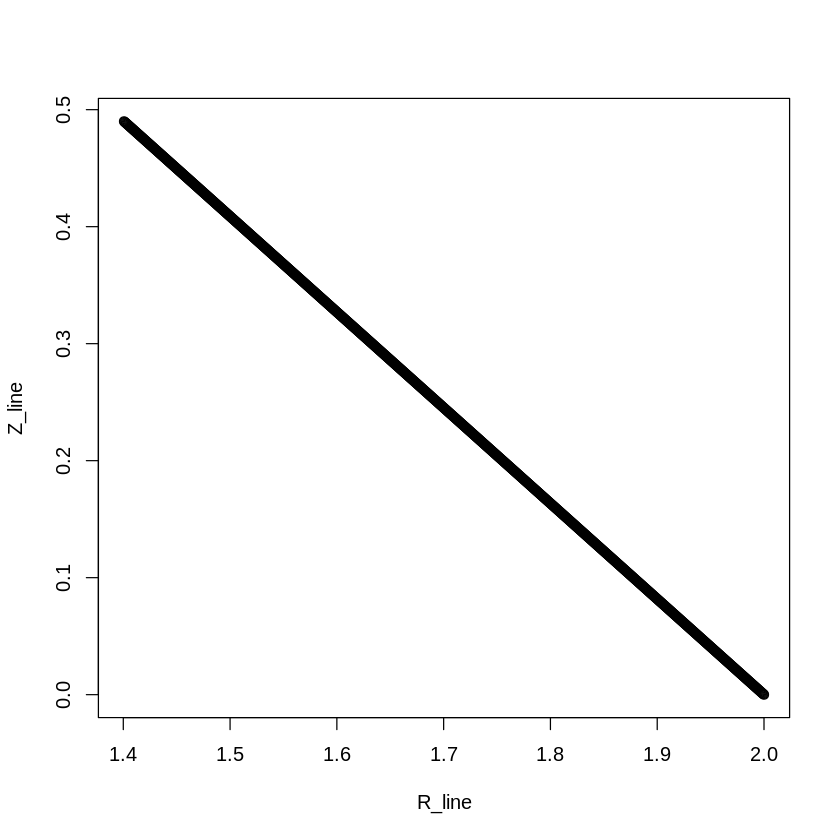

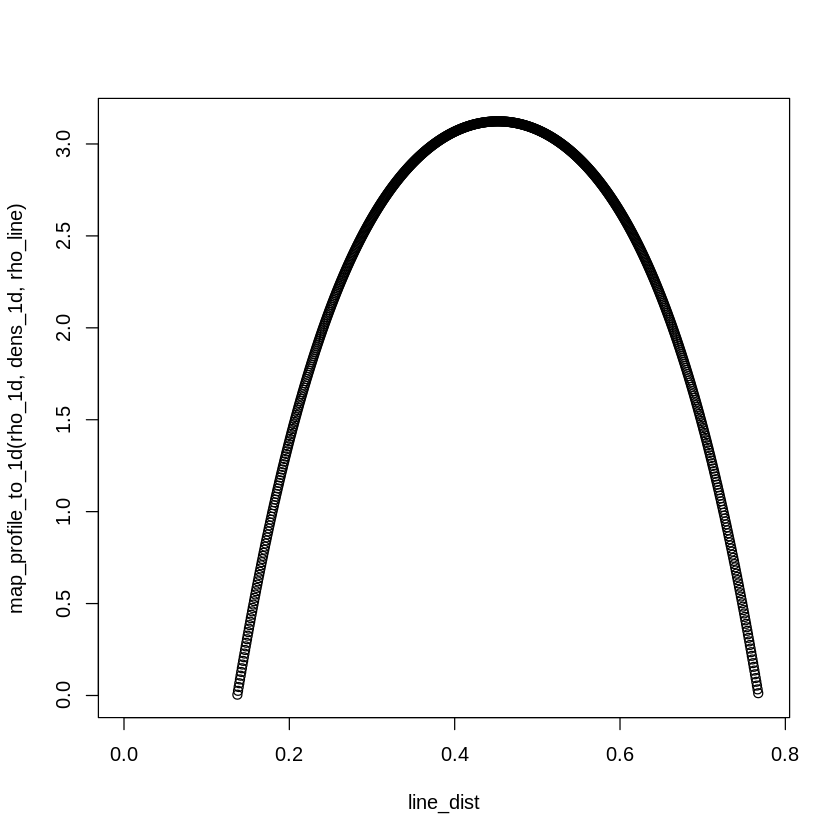

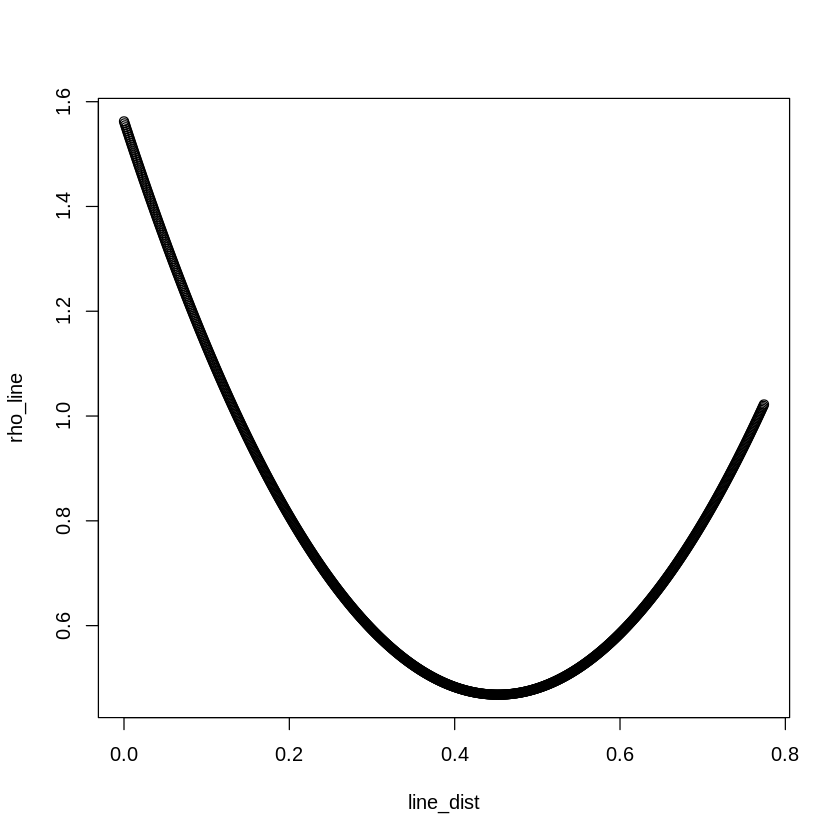

In [8]:
end_angles <-  seq(0.4, pi, length.out=5)
start_angles <-  rep(0, length(end_angles))
n_line <-3 

x_start <-  1.5 + 0.5 * cos(start_angles[n_line])
x_end   <-  1.5 + 0.5 * cos(end_angles[n_line])
y_start <-  0.5 * sin(start_angles[n_line])
y_end   <-  0.5 * sin(end_angles[n_line]) 
path_len <- sqrt((x_start- x_end)^2 + (y_start-y_end)^2)


line_dist= seq(0, path_len, length.out=1000)
RZ = draw_line(x_start, y_start, x_end, y_end, 1000)
R_line <- RZ[1]$v1
Z_line <- RZ[2]$v2

rho_line = get_rho(R_line, Z_line)
rho_1d = seq(0, 1, length.out=101)
dens_1d = (1 - rho_1d^2) * 4.0##
e_density <- map_profile_to_1d(rho_1d, dens_1d, rho_line)
e_density_cf <- e_density[!is.na(e_density)]## mask out na values
line_cf <- line_dist[!is.na(e_density)] ## take out same sections of the line values


### curve fit
if (length(e_density_cf)>0){
    df <- data.frame(x=line_cf, y=e_density_cf)
    x_axis <- df$x#seq(1, 10, length=10)
    linear_model2 <- lm(y~poly(x,2,raw=TRUE), data=df)
    p<-predict(linear_model2, data.frame(x=x_axis))
    c <-summary(linear_model2)$coefficients[, 1][[1]]
    b <-summary(linear_model2)$coefficients[, 1][[2]]
    a <-summary(linear_model2)$coefficients[, 1][[3]]
    cat(' a=', a, ', b=', b,'c=',c ,'\n')
}
plot(R_line, Z_line)
plot(line_dist, map_profile_to_1d(rho_1d, dens_1d, rho_line))
plot(line_dist, rho_line)

### Find coefficents ($\phi_1, \phi_2, \phi_3$)

In [ ]:
end_angles <-  seq(pi/4, 3*pi/4, length.out=2000) 
start_angles <-  rep(0, length(end_angles)) ## want them to all start in one place end in other 
n_line <-2 
rho_1d = seq(0, 1, length.out=101)
dens_1d = (1 - rho_1d^2) * 4.0##

for ( nl in 1:length(end_angles)){
    x_start <-  1.5 + 0.5 * cos(start_angles[nl])
    x_end   <-  1.5 + 0.5 * cos(end_angles[nl])
    y_start <-  0.5 * sin(start_angles[nl])
    y_end   <-  0.5 * sin(end_angles[nl]) 
    path_len <- sqrt((x_start- x_end)^2 + (y_start-y_end)^2)

    line_dist= seq(0, path_len, length.out=1000)
    RZ = draw_line(x_start, y_start, x_end, y_end, 1000)
    R_line <- RZ[1]$v1
    Z_line <- RZ[2]$v2
    rho_line <- get_rho(R_line, Z_line)
    e_density <- map_profile_to_1d(rho_1d, dens_1d, rho_line)
    e_density_cf <- e_density[!is.na(e_density)]## mask out na values
    line_cf <- line_dist[!is.na(e_density)] ## take out same sections of the line values
    if (length(e_density_cf)>0){#only curve fit if its not just na values
        df <- data.frame(x=line_cf, y=e_density_cf)
        x_axis <- df$x#seq(1, 10, length=10)
        linear_model2 <- lm(y~poly(x,2,raw=TRUE), data=df)
        p<-predict(linear_model2, data.frame(x=x_axis))
        c_ <-summary(linear_model2)$coefficients[, 1][[1]]
        b_ <-summary(linear_model2)$coefficients[, 1][[2]]
        a_ <-summary(linear_model2)$coefficients[, 1][[3]]
        if (sum(c(a_,b_,c_))!=0){
        a <- c(a, a_);b <- c(b, b_);c <- c(c, c_)
        cat(' a=', a_, ', b=', b_,'c=',c_ ,'\n')
        }
    }
    
}


"ranges"
cat('a_range:',a[which.min(a)], ' to ', a[which.max(a)], '\n',
    'b_range:',b[which.min(b)], ' to ', b[which.max(b)], '\n',
    'c_range:',c[which.min(c)], ' to ', c[which.max(c)], '\n')

## Diffrent Fits

[1] 817

[1] 817


Call:
lm(formula = y ~ poly(x, 3, raw = TRUE), data = df)

Coefficients:
            (Intercept)  poly(x, 3, raw = TRUE)1  poly(x, 3, raw = TRUE)2  
                -1.6842                  23.9709                 -24.7015  
poly(x, 3, raw = TRUE)3  
                 0.1554  


[1] "accessing fit"

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-1.6841773,0.07945447,-21.1967606,9.976070e-80
"poly(x, 3, raw = TRUE)1",23.9708983,0.61342515,39.0771364,7.998744e-189
"poly(x, 3, raw = TRUE)2",-24.7014546,1.38049565,-17.8931781,1.262961e-60
"poly(x, 3, raw = TRUE)3",0.1554167,0.93617541,0.1660124,8.681885e-01


 a= 0.1554167 , b= -24.70145 c= 23.9709 


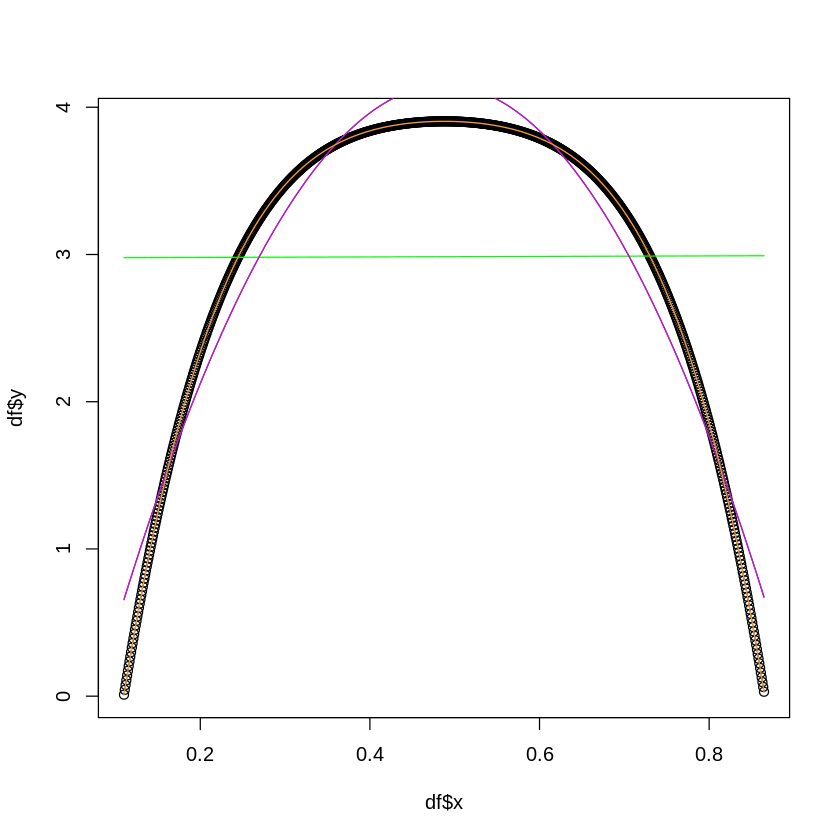

In [10]:
length(line_cf)
length(e_density_cf)

df <- data.frame(x=line_cf, y=e_density_cf)
  
# fit polynomial regression models up to degree 5
linear_model1 <- lm(y~x, data=df)
linear_model2 <- lm(y~poly(x,2,raw=TRUE), data=df)
linear_model3 <- lm(y~poly(x,3,raw=TRUE), data=df)
linear_model4 <- lm(y~poly(x,4,raw=TRUE), data=df)
linear_model5 <- lm(y~poly(x,5,raw=TRUE), data=df)
  
# create a basic scatterplot 
plot(df$x, df$y)
  
# define x-axis values
x_axis <- df$x#seq(1, 10, length=10)
  
# add curve of each model to plot
lines(x_axis, predict(linear_model1, data.frame(x=x_axis)), col='green')
lines(x_axis, predict(linear_model2, data.frame(x=x_axis)), col='red')
lines(x_axis, predict(linear_model3, data.frame(x=x_axis)), col='purple')
lines(x_axis, predict(linear_model4, data.frame(x=x_axis)), col='blue')
lines(x_axis, predict(linear_model5, data.frame(x=x_axis)), col='orange')
linear_model3
"accessing fit"
summary(linear_model3)$coefficients

d <- summary(linear_model3)$coefficients[, 1][[1]]
c <- summary(linear_model3)$coefficients[, 1][[2]]
b <- summary(linear_model3)$coefficients[, 1][[3]]
a <- summary(linear_model3)$coefficients[, 1][[4]]

#summary(linear_model3)$coefficients[, 1][[4]]

cat(' a=', a, ', b=', b,'c=',c ,'\n')
# linear_model3$coefficients[1]
# linear_model3$coefficients[2]
# linear_model3$coefficients[3]
# linear_model3$coefficients[4]

#predict(linear_model3, data.frame(x=x_axis))

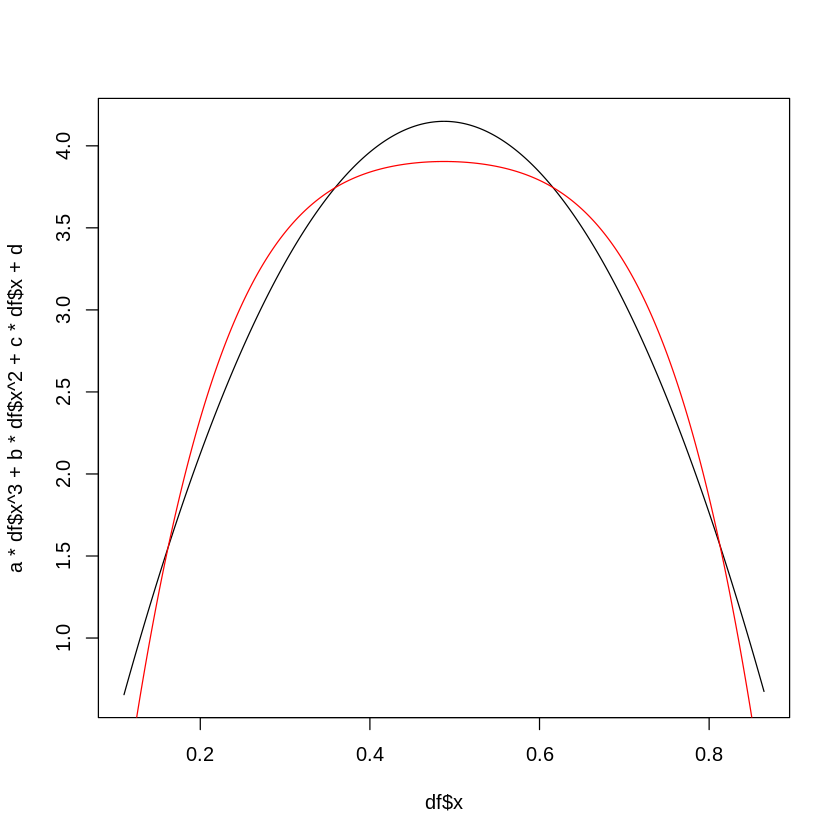

In [11]:
plot(df$x, a*df$x^3+b*df$x^2+ c*df$x+d, type = 'l')
lines(df$x, df$y, col='red')

In [12]:
end_angles <-  seq(0, 2*pi, length.out=5)
start_angles <-  rep(0, length(end_angles))
n_line <-4 

x_start <-  1.5 + 0.5 * cos(start_angles[n_line])
x_end   <-  1.5 + 0.5 * cos(end_angles[n_line])
y_start <-  0.5 * sin(start_angles[n_line])
y_end   <-  0.5 * sin(end_angles[n_line]) 
path_len <- sqrt((x_start- x_end)^2 + (y_start-y_end)^2)


line_dist= seq(0, path_len, length.out=1000)
RZ = draw_line(x_start, y_start, x_end, y_end, 1000)
R_line <- RZ[1]$v1
Z_line <- RZ[2]$v2

rho_line = get_rho(R_line, Z_line)
e_density <- map_profile_to_1d(rho_1d, dens_1d, rho_line)
e_density_cf <- e_density[!is.na(e_density)]
line_cf <- line_dist[!is.na(e_density)]
length(e_density_cf)
length(line_cf)

### curve fit
df <- data.frame(x=line_cf, y=e_density_cf)
x_axis <- df$x#seq(1, 10, length=10)
linear_model2 <- lm(y~poly(x,2,raw=TRUE), data=df)
p<-predict(linear_model2, data.frame(x=x_axis))
c <-summary(linear_model2)$coefficients[, 1][[1]]
b <-summary(linear_model2)$coefficients[, 1][[2]]
a <-summary(linear_model2)$coefficients[, 1][[3]]
cat(' a=', a, ', b=', b,'c=',c ,'\n')



[1] 780

[1] 780

 a= -31.86228 , b= 27.47428 c= -3.357563 


## 2D Plotting

In [13]:
R <- seq(1, 2, length.out=105)
Z <- seq(-0.5, 0.5, length.out=105)

for (r in R){ ### line width
    r_line   <- rep(r, 105)
    rho_line <- get_rho(r_line, Z)
    e_line   <- map_profile_to_1d(rho_1d, dens_1d, rho_line)
    df_2D <- data.frame(x=, y=e_density_cf)
    
}





Warning message in min(xi):
“no non-missing arguments to min; returning Inf”
Warning message in max(xi):
“no non-missing arguments to max; returning -Inf”


ERROR: Error in data.frame(x = , y = e_density_cf): argument is missing, with no default


In [ ]:
?matrix

# Porting Hao Wu's simulation into R

[1] 0.61980166 0.06066056

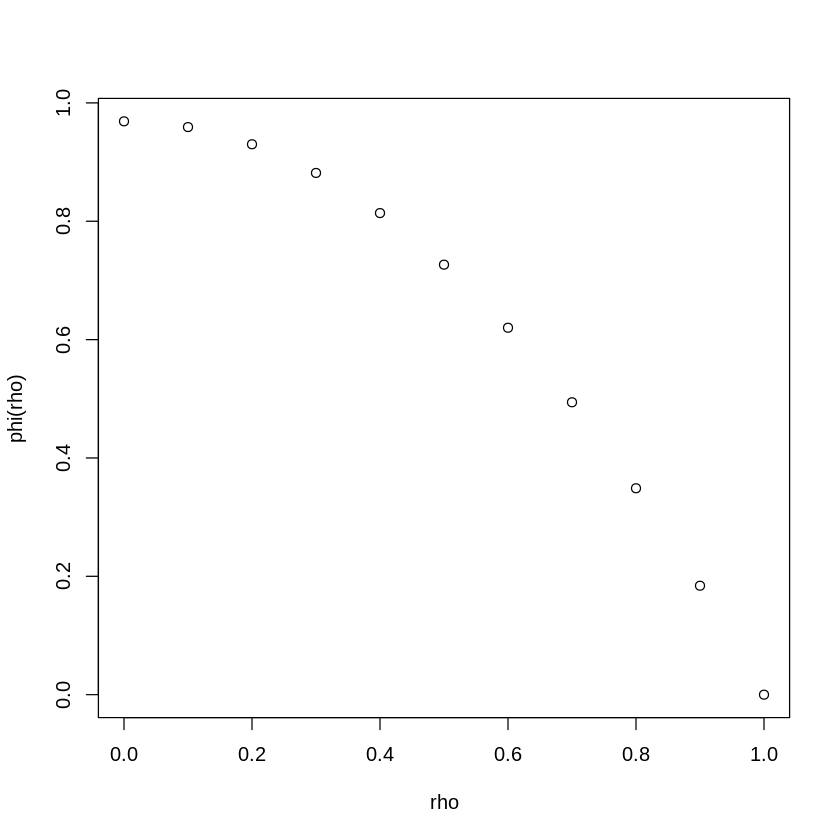

In [20]:
#A ported version of Hao Wu's python code into R for the simulated plasma density profile.
get_rho <- function(R, Z){
    (R - 1.5)^2 / 0.16 + Z ** 2 / 0.25
}

draw_line <- function(x_start, y_start, x_end, y_end, n_points){
    m <- (y_end-y_start)/(x_end-x_start)
    c <- y_start-m*x_start
    #print('m=', m, 'c=' ,c )
    x <- seq(x_start, x_end, length.out=n_points)
    y <- m*x+ c
    #cat(x, y)
    return(list(v1=x, v2=y))
}

RZ_line <- function(start_angles, end_angles){
    num_los  <- length(start_angles)
    rho_line <- rep(0, num_los)
    for (i in 1:num_los){
        x_start <-  1.5 + 0.5 * cos(start_angles[i])
        x_end   <-  1.5 + 0.5 * cos(end_angles[i])
        y_start <-  0.5 * sin(start_angles[i])
        y_end   <-  0.5 * sin(end_angles[i])    
        #R_line, Z_line = draw_line(x_start, y_start, x_end, y_end, 1000)
        rho_line[i] <-get_rho(draw_line(x_start, y_start, x_end, y_end, 1000))
    }
    return(rho_line)
}


#########  Working electron density profile  --------------------------------------
map_profile_to_1d <- function(rho_1d, dens_1d, rho_2d){
    '
    Map 1-D electron density profile to 2-D
    '
    #rho_2d_flat = rho_2d.flatten()
    rho_2d_flat <-rho_2d
    
    #dens_2d_flat = np.zeros_like(rho_2d_flat)
    dens_2d_flat <- rep(0, length(rho_2d_flat))
    
    #indices_inside = np.argwhere(rho_2d_flat <= 1.0).flatten()
    argwhere <- function(x,funct)which(funct(x))
    f <- function(x){x <= 1}
    indices_inside <- argwhere(rho_2d_flat, f)
    
    #dens_2d_flat[indices_inside] = interp1d(rho_1d, dens_1d, kind='cubic')(rho_2d_flat[indices_inside])
    dens_2d_flat[indices_inside] <- interp1(rho_1d, dens_1d, rho_2d_flat[indices_inside], method='cubic')##
    
    #dens_2d_flat[rho_2d_flat > 1.0] = np.nan
    dens_2d_flat[rho_2d_flat > 1.0] = NaN ## they used nan
    
    #return dens_2d_flat.reshape(rho_2d.shape)
    return(dens_2d_flat)
} #### -----------------------------------------------------------------------------
#phi example phi<-function(rho){ (1 - rho_1d^2) * 4.0}
eta <- list(c(0,pi),c(0,0.4*pi))
LID <- function(eta,phi=(function(rho) (1 - rho^2) * 4.0), addError=FALSE, exp_er=0.05){
    lid <- vector()
    for (line in eta){
        start_angle <- line[1]; end_angle <- line[2]
        x_start <-  1.5 + 0.5 * cos(start_angle)
        x_end   <-  1.5 + 0.5 * cos(end_angle)
        y_start <-  0.5 * sin(start_angle)
        y_end   <-  0.5 * sin(end_angle) 
        path_len <- sqrt((x_start- x_end)^2 + (y_start-y_end)^2)
        line_dist= seq(0, path_len, length.out=20)
        RZ = draw_line(x_start, y_start, x_end, y_end, 20)
        R_line <- RZ[1]$v1
        Z_line <- RZ[2]$v2

        rho_line = get_rho(R_line, Z_line)
        rho_1d = seq(0, 1, length.out=101)
        dens_1d = phi(rho_1d)
        e_density <- map_profile_to_1d(rho_1d, dens_1d, rho_line)
        e_density_cf <- e_density[!is.na(e_density)]## mask out na values
        line_cf <- line_dist[!is.na(e_density)] ## take out same sections of the line values
        dens <- data.frame(x=line_cf, y=e_density_cf)
        #uses haoWu's ported code to return the simulated density profile
        #fit a 4degree polynomial to the line.
        coeff <- function(ord){return(summary(linear_model2)$coefficients[, 1][[ord]])}
        linear_model2 <- lm(y~poly(x,4,raw=TRUE), data=dens)
        a<-coeff(5);b<-coeff(4);c<-coeff(3);d<-coeff(2);e<-coeff(1)
        lo <- dens$x[1]
        up <- tail(dens$x,n=1)
        #uses the exact integral function to find the line integrated density from the coefficients
        LID_line <- ((a/5)*up^5+(b/4)*up^4+(c/3)*up^3+(d/2)*up^2+e*up) - ((a/5)*lo^5+(b/4)*lo^4+(c/3)*lo^3+(d/2)*lo^2+e*lo)
        lid <- c(lid,LID_line)
    }
    if(addError){lid <- lid+rnorm(length(lid),mean=0,sd=exp_er)}
    return(lid)
}
phi <- phiSampleParabola()
rho <- seq(0,1,0.1)
plot(rho,phi(rho))
                        
LID(eta, addError = FALSE,phi=phi)

## Sampling $\phi$
Phi is the plasma density profile. The plasma density of a polodial crossection of a tokamak is modeled as concentric elipses. Linear density profile along a normalised radious ($\rho$) is kept constant and known as $\phi$.

An option is to assume some prior knowledge of this desnity profile. First it is assumed the density profile follows a negative parabola, has a maximum value in the center and is 0 at the edge of the plasma. There is never a negative density and the maximum density is 6 UNITS. These requirements are met by the parabola,

$$n_e(\rho) = a(1-\rho^2),$$

where a is the maximum density at the center of the plasma body, $\rho=0$.

A second prior is then used to see how the affect of the prior knowledge affects the ideal design parameters. This prior only assumes the density is never negative and follows a 4 degree polynomial. 

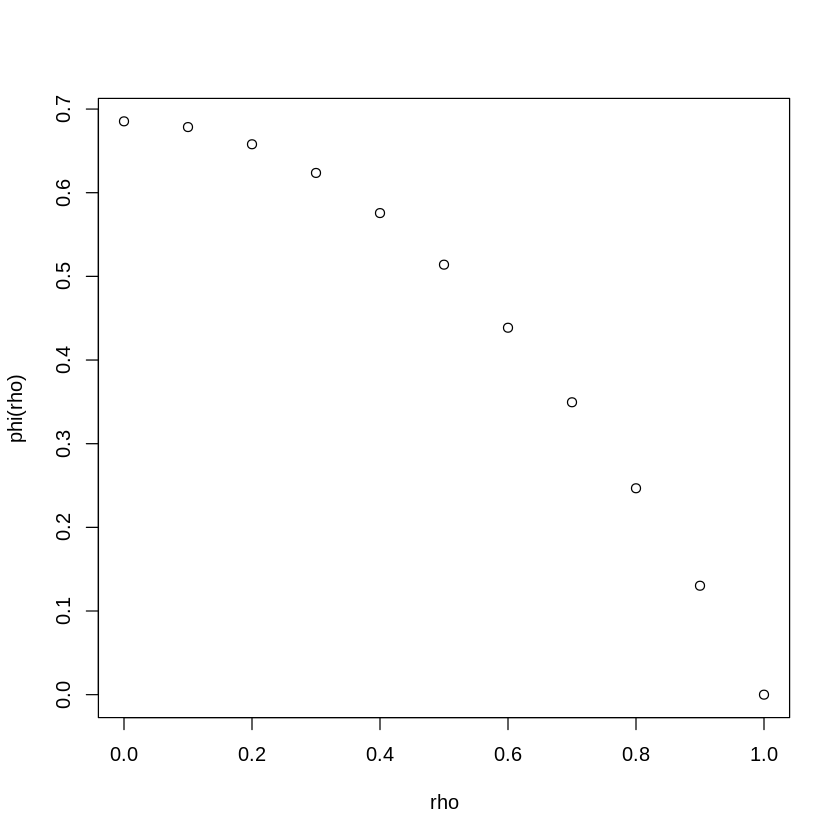

In [15]:
phiSampleParabola <- function(){
    a <- runif(n=1, min=0.5, max=1.5)
    phi <- function(rho){
        a*(1-rho^2)
    }
    return(phi)
}

phiSamplePoly <- function(){
    #create 6 rho values
    rho <- seq(0,1,(1/5))
    cat(rho,'\n')
    dens0 <- runif(n=1,min=0,max=6)
    dens1234 <- runif(n=4, min=0, max=dens0)
    dens <- c(dens0,dens1234,0)
    plot(rho,dens)
    dens <- data.frame(x=rho, y=dens)
    linear_model <- lm(y~poly(x,4,raw=TRUE), data=dens)
    coeff <- function(ord){return(summary(linear_model)$coefficients[, 1][[ord]])}
    a<-coeff(5);b<-coeff(4);c<-coeff(3);d<-coeff(2);e<-coeff(1)
    phi <- function(rho,a,b,c){a*rho**4 + b*rho**3 + c*rho**2 + d*rho + e}
    rho2 <- seq(0,1,0.01)
    dens2 <- phi(rho2,a,b,c)
    plot(rho2,dens2,type='l')
}
rho <- seq(0,1,0.1)
phi <- phiSampleParabola()
plot(rho,phi(rho))

In [21]:
exUtility <- function(eta,phi_true){
    LID_true <- LID(phi=phi_true, eta=eta)
    exp_er <- 0.05
    n <- 100
    exutility_n <- vector()
    #sampling from the joint distribution P(phi)P(D|phi,eta)
    # sampling n phi samples from P(phi)
    phi_samples <- vector()
    LID_phi <- vector()
    D <- vector()
    for (itter in seq(n)){
        phi_i <- phiSampleParabola()
        phi_samples <-  c(phi_samples,phi_i)
        LID_phi_i <- LID(phi=phi_i, eta=eta, addError=FALSE)
        LID_phi <- c(LID_phi,LID_phi_i)
        D_i <- LID_phi_i + rnorm(length(LID_phi_i),mean=0,sd=exp_er)
        D <- c(D,D_i)
    }
    for (i in seq(n)){
        #likelihood_rand P(D_i|phi_i,eta)
        likelihood <- dnorm(D[i], mean=LID_phi[i], sd=exp_er)
        #marginalised likelihood, P(D_i|eta), another montecarlo integration
        mlikelihood_n <- vector()
        for (j in seq(n)){
            likelihood2 <- dnorm(D[i], mean=LID_phi[j],sd=exp_er)
            mlikelihood_n <- c(mlikelihood_n,likelihood2)
        }
#         cat('\nmli_n',mlikelihood_n)
        mlikelihood <- mean(mlikelihood_n) #marginalised likelihood
#         cat('\nli:',likelihood)
#         cat('\nmli:',mlikelihood)
        exutility_n <- c(exutility_n,log(likelihood/mlikelihood))
    }
    exutility <- mean(exutility_n)
    return(exutility)
}
eta <- list(c(0,pi))
print('eta:'); print(eta); cat('\nexUtility:',exUtility(eta, phi_true= (function(rho) (1 - rho^2) * 4.0)))

[1] "eta:"
[[1]]
[1] 0.000000 3.141593


exUtility: 1.330799

In [1]:
exUtility2 <- function(eta,phi_true){
    LID_true <- LID(phi=phi_true, eta=eta)
    exp_er <- 0.05
    n <- 100
    exutility_n <- vector()
    #sampling from the joint distribution P(phi)P(D|phi,eta)
    # sampling n phi samples from P(phi)
    phi_samples <- vector()
    LID_phi <- list()
    D <- list()
    for (itter in seq(n)){
        phi_i <- phiSampleParabola()
        phi_samples <-  c(phi_samples,phi_i)
        LID_phi_i <- LID(phi=phi_i, eta=eta, addError=FALSE)
        LID_phi[[itter]] <- LID_phi_i
        D_i <- LID_phi_i + rnorm(length(LID_phi_i),mean=0,sd=exp_er)
        D[[itter]] <- D_i
    }
    for (i in seq(n)){
        #likelihood_rand P(D_i|phi_i,eta)
        likelihood <- dnorm(D[i], mean=LID_phi[i], sd=exp_er)
        #marginalised likelihood, P(D_i|eta), another montecarlo integration
        mlikelihood_n <- vector()
        for (j in seq(n)){
            likelihood2 <- dnorm(D[i], mean=LID_phi[j],sd=exp_er)
            mlikelihood_n <- c(mlikelihood_n,likelihood2)
        }
#         cat('\nmli_n',mlikelihood_n)
        mlikelihood <- mean(mlikelihood_n) #marginalised likelihood
#         cat('\nli:',likelihood)
#         cat('\nmli:',mlikelihood)
        exutility_n <- c(exutility_n,log(likelihood/mlikelihood))
    }
    exutility <- mean(exutility_n)
    return(exutility)
}
eta <- list(c(0,pi))
print('eta:'); print(eta); cat('\nexUtility:',exUtility(eta, phi_true= (function(rho) (1 - rho^2) * 4.0)))

[1] "eta:"
[[1]]
[1] 0.000000 3.141593



ERROR: Error in exUtility(eta, phi_true = (function(rho) (1 - rho^2) * 4)): could not find function "exUtility"


In [22]:
angles <- seq(0.4*pi,2*pi-0.4*pi,0.01*pi)
exU <- vector()
start <- Sys.time()
for (ang in angles){
    exU <- c(exU,exUtility(eta=list(c(ang,0)), phi_true= (function(rho) (1 - rho^2))))
}
end <- Sys.time()

In [23]:
print(end-start)

Time difference of 27.15991 secs


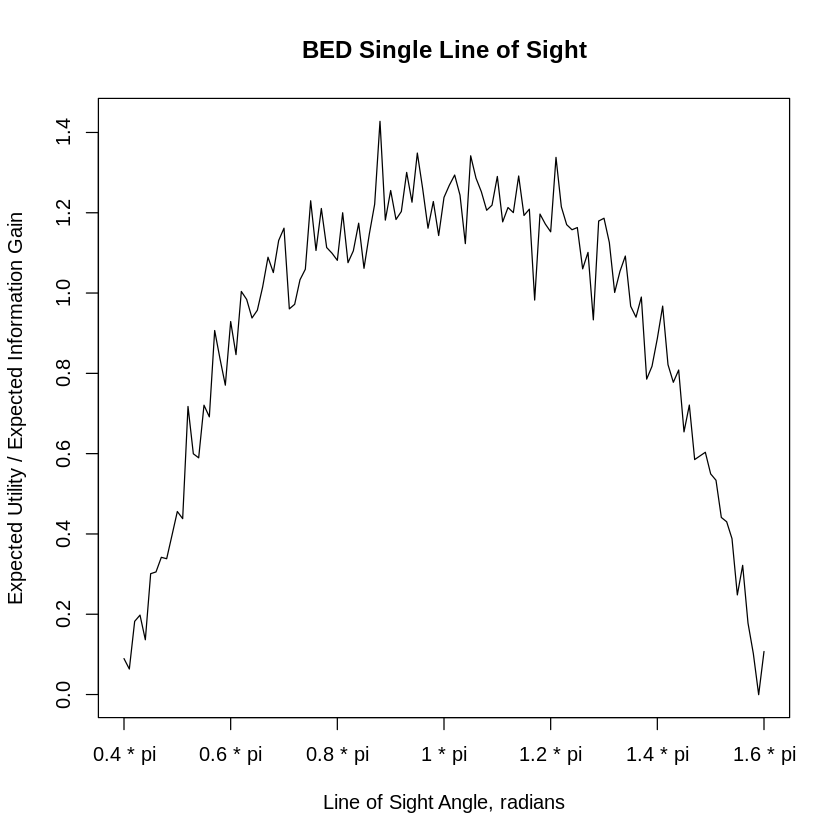

In [24]:
plot(angles,exU,type='l',main='BED Single Line of Sight',xlab='Line of Sight Angle, radians',ylab='Expected Utility / Expected Information Gain',xaxt="n")
lbl_angles <- seq(0.4,1.6,0.2)
quotes <- vector()
for (ang in lbl_angles){
    quotes <- c(quotes,bquote(.(ang)*pi))
}
axis(1, at=lbl_angles*pi, labels=quotes)

In [319]:
a = 55
print(as.character(a))
cat(expression(frac(1,10)*pi))

[1] "55"


ERROR: Error in cat(expression(frac(1, 10) * pi)): argument 1 (type 'expression') cannot be handled by 'cat'


In [88]:
#given sampled coefficients, returns the LID 
calcLIDphi <- function(lo,up,quadratic=0,polyfour=0){
    if (length(quadratic)==3){
        a=quadratic[1];b=quadratic[2];c=quadratic[3]
        return(((a/3)*up^3+(b/2)*up^2+c*up) - ((a/3)*lo^3+(b/2)*lo^2+c*lo))
    }
    
    else if (length(polyfour)==5){
        a=polyfour[1];b=polyfour[2];c=polyfour[3];d=polyfour[4];e=polyfour[5] 
        return(((a/5)*up^5+(b/4)*up^4+(c/3)*up^3+(d/2)*up^2+e*up) - ((a/5)*lo^5+(b/4)*lo^4+(c/3)*lo^3+(d/2)*lo^2+e*lo))
    }
}

#used to find the true LID for the simulated plasma density
LIDtrue <- function(start_angle, end_angle){
    #uses haoWu's ported code to return the simulated density profile
    dens <- getDensProfile(start_angle, end_angle)
    #fit a 4degree polynomial to the line. 
    linear_model2 <- lm(y~poly(x,4,raw=TRUE), data=dens)
    e <-summary(linear_model2)$coefficients[, 1][[1]]
    d <-summary(linear_model2)$coefficients[, 1][[2]]
    c <-summary(linear_model2)$coefficients[, 1][[3]]
    b <-summary(linear_model2)$coefficients[, 1][[4]]
    a <-summary(linear_model2)$coefficients[, 1][[5]]
#     fittedDens <- function(x){
#         return(a*x^4 + b*x^3 + c*x^2 + d*x + e)
#     }
    lo <- dens$x[1]
    up <- tail(dens$x,n=1)
    #uses the exact integral function to find the line integrated density from the coefficients
    LIDt <- calcLIDphi(lo,up,polyfour=c(a,b,c,d,e))
    return(LIDt)
}


In [94]:
seq(5)

[1] 1 2 3 4 5

In [ ]:
utility <- function(Dj,LIDt,x_entry,x_exit,exp_er,n){
    #Likelihood P(Dj|phi_i,eta)
    utility_n <- vector()
    for (i in seq(1,n)){
        LID_phi <- phiSample(x_entry,x_exit,quadratic = TRUE)
        likelihood <- rnorm(1,mean=LID_phi,sd=exp_er)
        
        evidence <- rnorm(1,mean=LIDt,sd=exp_er)
        utility_i <- (likelihood/evidence)*log2(likelihood/evidence)
        utility_n <- c(utility_n,utility_i)
        
#         cat("\nLID_phi", LID_phi)
#         cat("\nlikelihood", likelihood)
#         cat("\nevidence", evidence)
#         cat("\nui", utility_i)
    }
    utility <- mean(utility_n)
#     cat('\nutility',utility)
    return(utility)
}
exUtility <- function(eta){
    LIDt <- LIDtrue(eta[1],eta[2])
    x <- getDensProfile(eta[1],eta[2])$x
    x_entry <- x[1]
    x_exit <- tail(x,n=1)
    exp_er <- 0.3
    n <- 5
    #sampling data points. The experiment will measure a LID which is close to LIDt. 
    D <- rnorm(n, mean=LIDt, sd=exp_er)
    utilities <- vector()
    for (Dj in D){
        utilities <- c(utilities,utility(Dj,LIDt,x_entry,x_exit,exp_er,n))
    }
    cat('\nutilities:',utilities)
    exutility <- mean(utilities)
    return(exutility)
}
eta <- c(0,pi)
exu <- exUtility(eta)
cat("\nexU",exu)

In [42]:
eta <- c(0,pi)
getDensProfile(eta[1],eta[2])

x,y
<dbl>,<dbl>
0.1001001,0.004002506
0.1011011,0.043862789
0.1021021,0.083423494
0.1031031,0.122687241
0.1041041,0.161654777
0.1051051,0.200328085
0.1061061,0.238708207
0.1071071,0.276797012
0.1081081,0.314595670
